# Machine Learning for Texts Project 

# Project Statement

The Film Junky Union, a new edgy community for classic movie enthusiasts, is developing a system for filtering and categorizing movie reviews. The goal is to train a model to automatically detect negative reviews. You'll be using a dataset of IMBD movie reviews with polarity labelling to build a model for classifying positive and negative reviews. It will need to have an F1 score of at least 0.85.

## Initialization

In [1]:
import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# the next line provides graphs of better quality on HiDPI screens
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# this is to use progress_apply, read more at https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Load Data

In [4]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
tconst             47331 non-null object
title_type         47331 non-null object
primary_title      47331 non-null object
original_title     47331 non-null object
start_year         47331 non-null int64
end_year           47331 non-null object
runtime_minutes    47331 non-null object
is_adult           47331 non-null int64
genres             47331 non-null object
average_rating     47329 non-null float64
votes              47329 non-null Int64
review             47331 non-null object
rating             47331 non-null int64
sp                 47331 non-null object
pos                47331 non-null int64
ds_part            47331 non-null object
idx                47331 non-null int64
dtypes: Int64(1), float64(1), int64(5), object(10)
memory usage: 6.2+ MB


In [6]:
df_reviews.sample(3)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
37165,tt0404075,video,The Ghosts of Angela Webb,The Ghosts of Angela Webb,2005,\N,90,0,Horror,5.6,65,This straight to video cheap flick is based on...,1,neg,0,test,9889
6179,tt0080491,movie,Caligula,Caligola,1979,\N,156,0,"Drama,History",5.4,32782,I rated this movie a 3 and that was generous. ...,3,neg,0,test,9978
29473,tt0809941,video,San Franpsycho,San Franpsycho,2006,\N,106,0,"Horror,Thriller",2.7,649,Without a shadow of a doubt this is and probab...,1,neg,0,test,12370


In [7]:
# I want to look at one movie's records
df_reviews.query("tconst == 'tt0115341'")

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
29373,tt0115341,tvSeries,Sabrina the Teenage Witch,Sabrina the Teenage Witch,1996,2003,22,0,"Comedy,Family,Fantasy",6.6,32924,when i first started watching these it became ...,7,pos,1,train,6696
29374,tt0115341,tvSeries,Sabrina the Teenage Witch,Sabrina the Teenage Witch,1996,2003,22,0,"Comedy,Family,Fantasy",6.6,32924,When Sabrina first came onto our screens i was...,8,pos,1,train,6699
29375,tt0115341,tvSeries,Sabrina the Teenage Witch,Sabrina the Teenage Witch,1996,2003,22,0,"Comedy,Family,Fantasy",6.6,32924,The sitcom revolved around a girl who must lea...,8,pos,1,train,6700
29376,tt0115341,tvSeries,Sabrina the Teenage Witch,Sabrina the Teenage Witch,1996,2003,22,0,"Comedy,Family,Fantasy",6.6,32924,"Even though there are no new episodes, and it ...",8,pos,1,train,6702
29377,tt0115341,tvSeries,Sabrina the Teenage Witch,Sabrina the Teenage Witch,1996,2003,22,0,"Comedy,Family,Fantasy",6.6,32924,My kids recently started watching the reruns o...,8,pos,1,train,6703
29378,tt0115341,tvSeries,Sabrina the Teenage Witch,Sabrina the Teenage Witch,1996,2003,22,0,"Comedy,Family,Fantasy",6.6,32924,I remember this show as it became a regular vi...,8,pos,1,train,6706
29379,tt0115341,tvSeries,Sabrina the Teenage Witch,Sabrina the Teenage Witch,1996,2003,22,0,"Comedy,Family,Fantasy",6.6,32924,i really liked the first 2 seasons. because a ...,9,pos,1,train,6701
29380,tt0115341,tvSeries,Sabrina the Teenage Witch,Sabrina the Teenage Witch,1996,2003,22,0,"Comedy,Family,Fantasy",6.6,32924,"For the first three seasons, Sabrina was a gem...",9,pos,1,train,6704
29381,tt0115341,tvSeries,Sabrina the Teenage Witch,Sabrina the Teenage Witch,1996,2003,22,0,"Comedy,Family,Fantasy",6.6,32924,I know sometimes its really really corny... Bu...,9,pos,1,train,6707
29382,tt0115341,tvSeries,Sabrina the Teenage Witch,Sabrina the Teenage Witch,1996,2003,22,0,"Comedy,Family,Fantasy",6.6,32924,I love Sabrina! Its one of my fave shows!! My ...,9,pos,1,train,6712


We can see that moset of the columns in the data set are data about the movie, which is common for all it's records. only the columns 'review','rating','sp' and 'pos' reffer exclusively to the specific review.

Since our mission is to predict the sentiment of a review from it's text, we are not supposed to take into the model any information but the review (and its classification in the train set) 

## EDA

Let's check the number of movies and reviews over years.

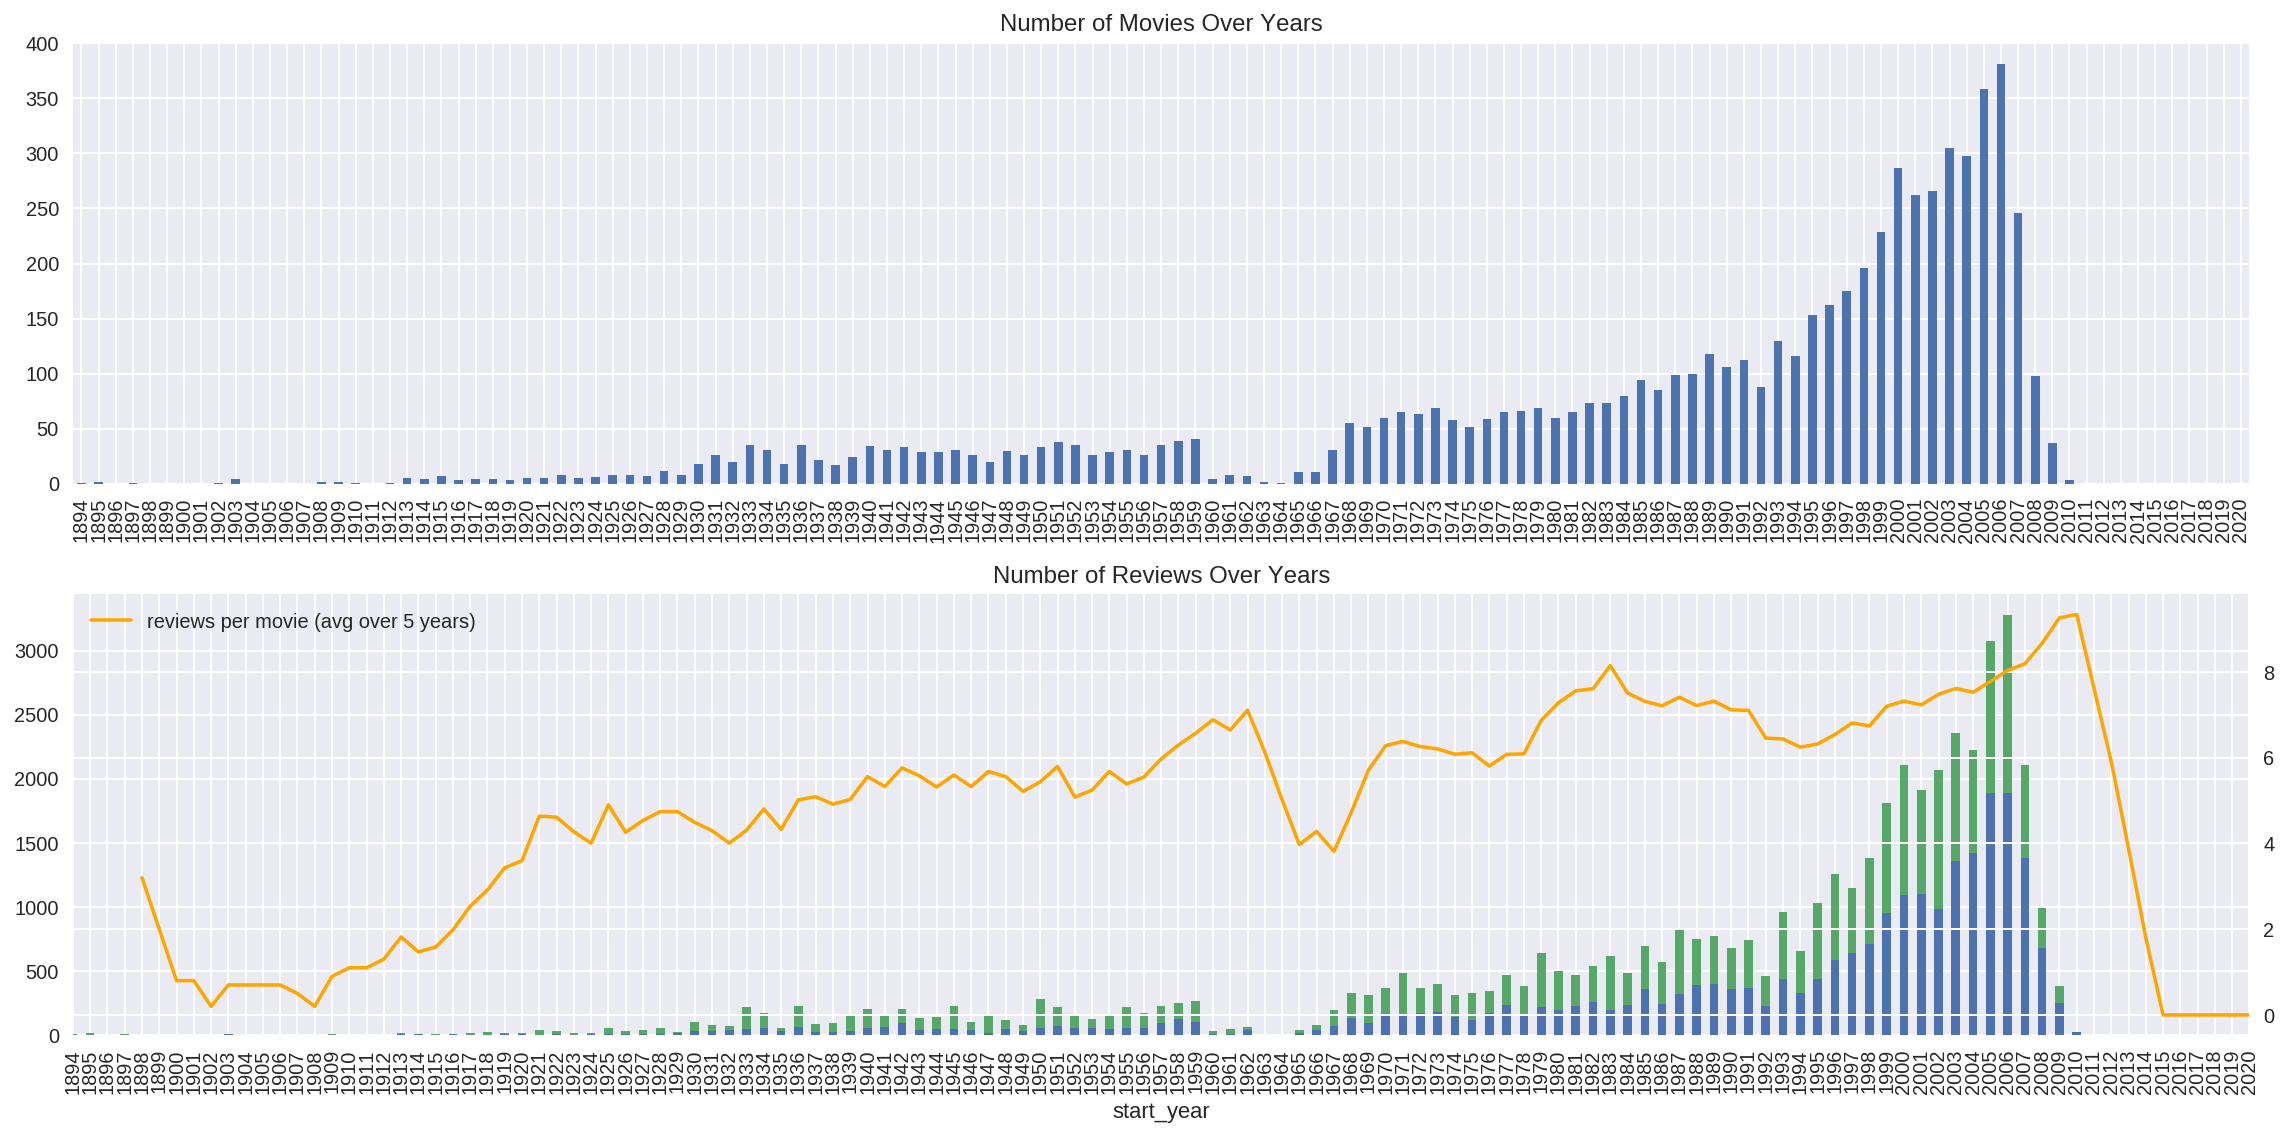

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Number of Movies Over Years')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Number of Reviews Over Years')

fig.tight_layout()

Let's check the distribution of number of reviews per movie with the exact counting and KDE (just to learn how it may differ from the exact counting)

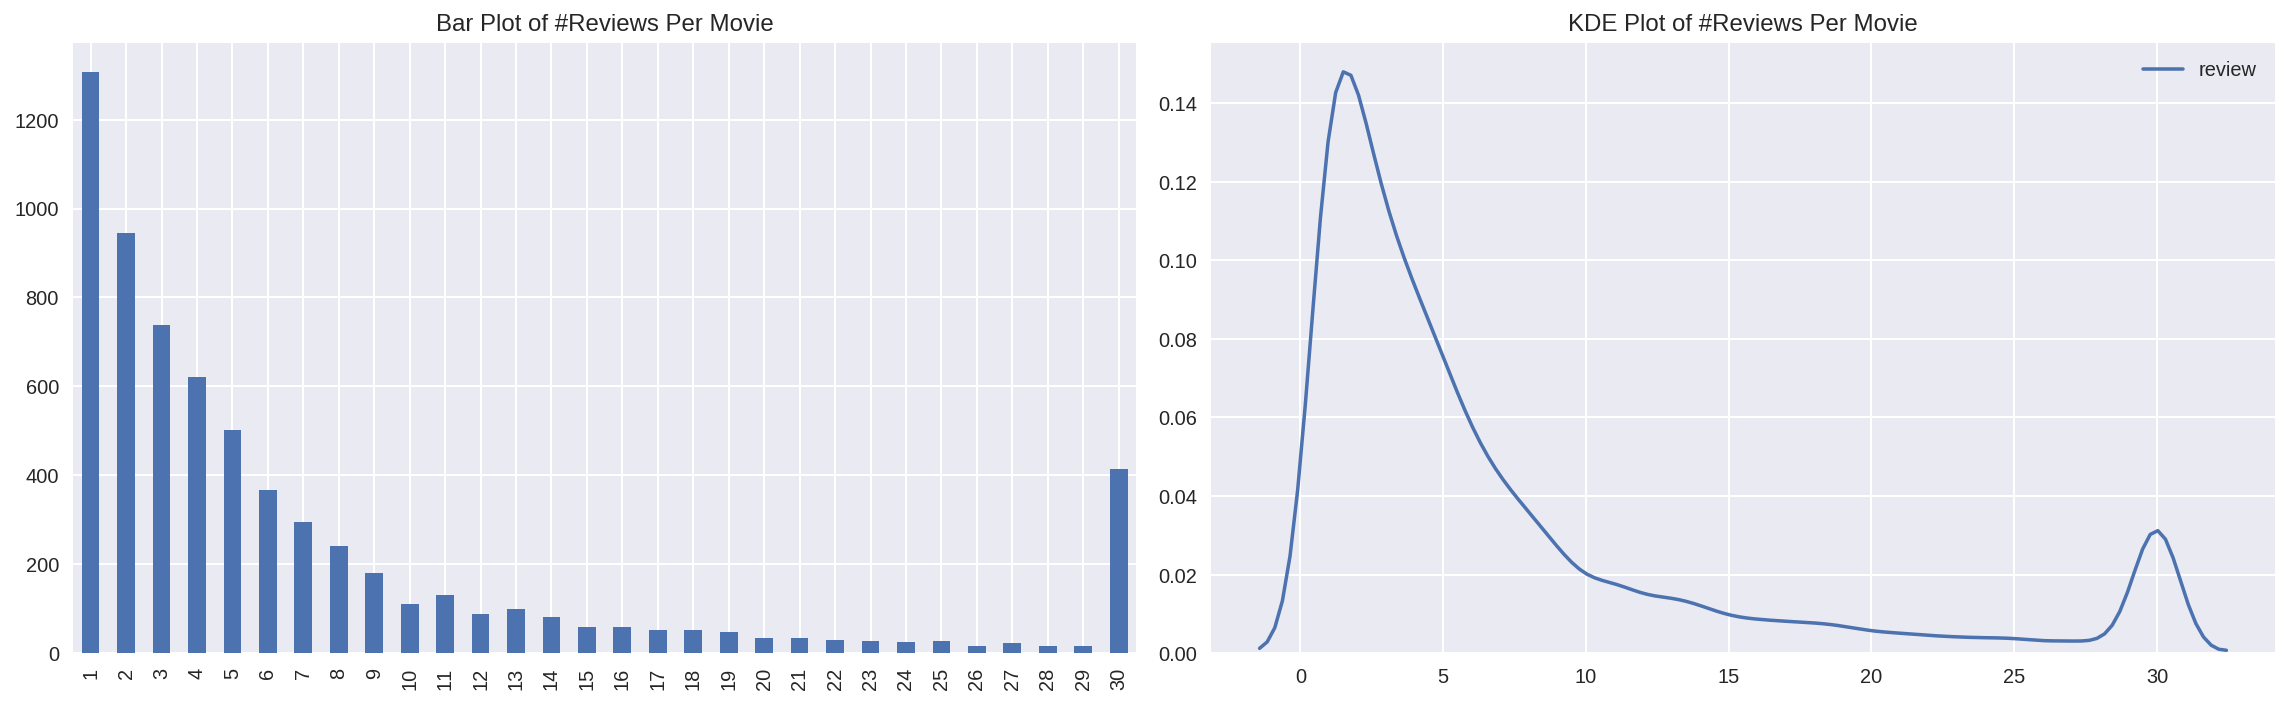

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Bar Plot of #Reviews Per Movie')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('KDE Plot of #Reviews Per Movie')

fig.tight_layout()

### EDA Conclusions:

We can see that the number of movies steadily rising from the begining of the 20 century until the begining of 21'st century. The total number of reviews per year graph follows the shape of the movies graph e.g. the number of yearly reviews is a product of yearly number of movies.  we can also see that the average reviews per movies (over 5 years) didn't change so much during the times (except for a drop between 1963-1970). 

Number of reviews per movie has a right tailed distribution: from 1 review which is the most common, until 29 reviews, there are less and less movies. Strangely, many movies have 30 reviews. maybe its 30 and more?

In [10]:
df_reviews.groupby('tconst')['review'].count().value_counts()

1     1307
2      944
3      738
4      622
5      503
30     415
6      367
7      294
8      241
9      180
11     132
10     111
13      99
12      89
14      82
15      60
16      58
17      53
18      52
19      48
20      35
21      35
22      29
23      28
25      28
24      25
27      24
26      17
28      16
29      16
Name: review, dtype: int64

In [11]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

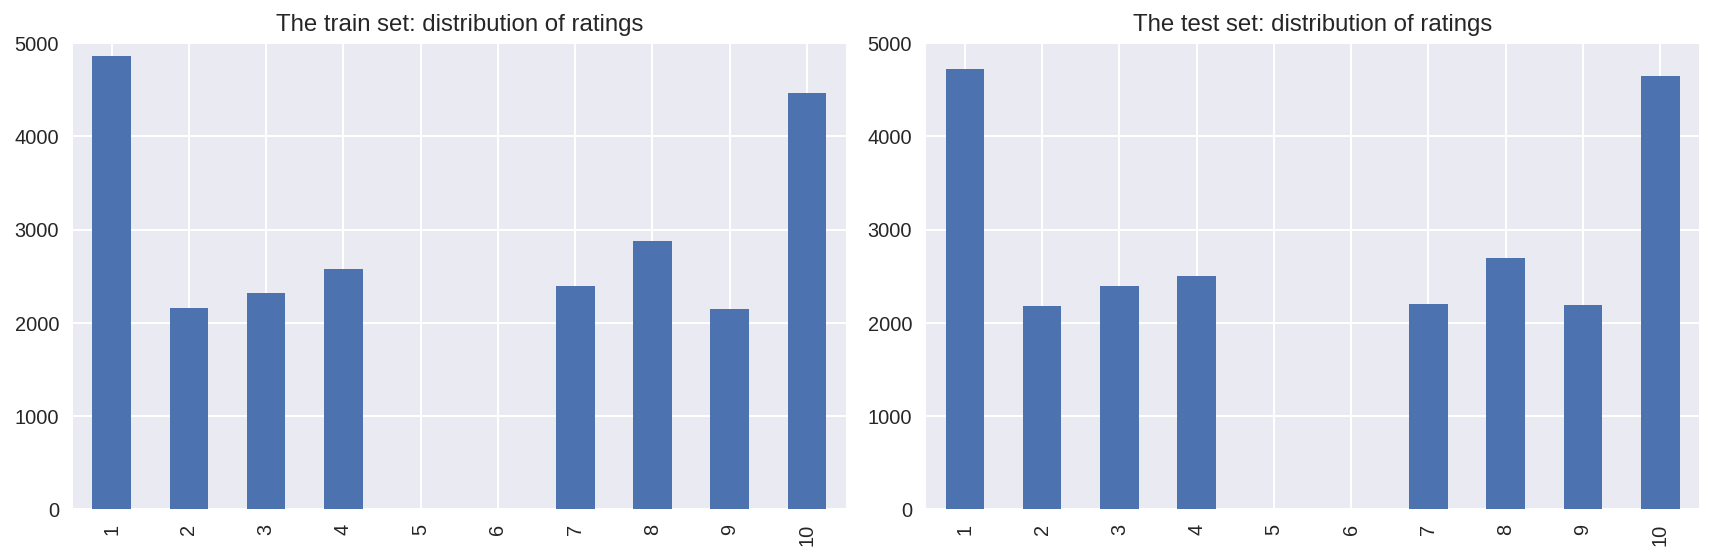

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The train set: distribution of ratings')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('The test set: distribution of ratings')

fig.tight_layout()

**The classes are balanced and also the distribution of ratings is identical between train and test sets.**

Distribution of negative and positive reviews over the years for two parts of the dataset

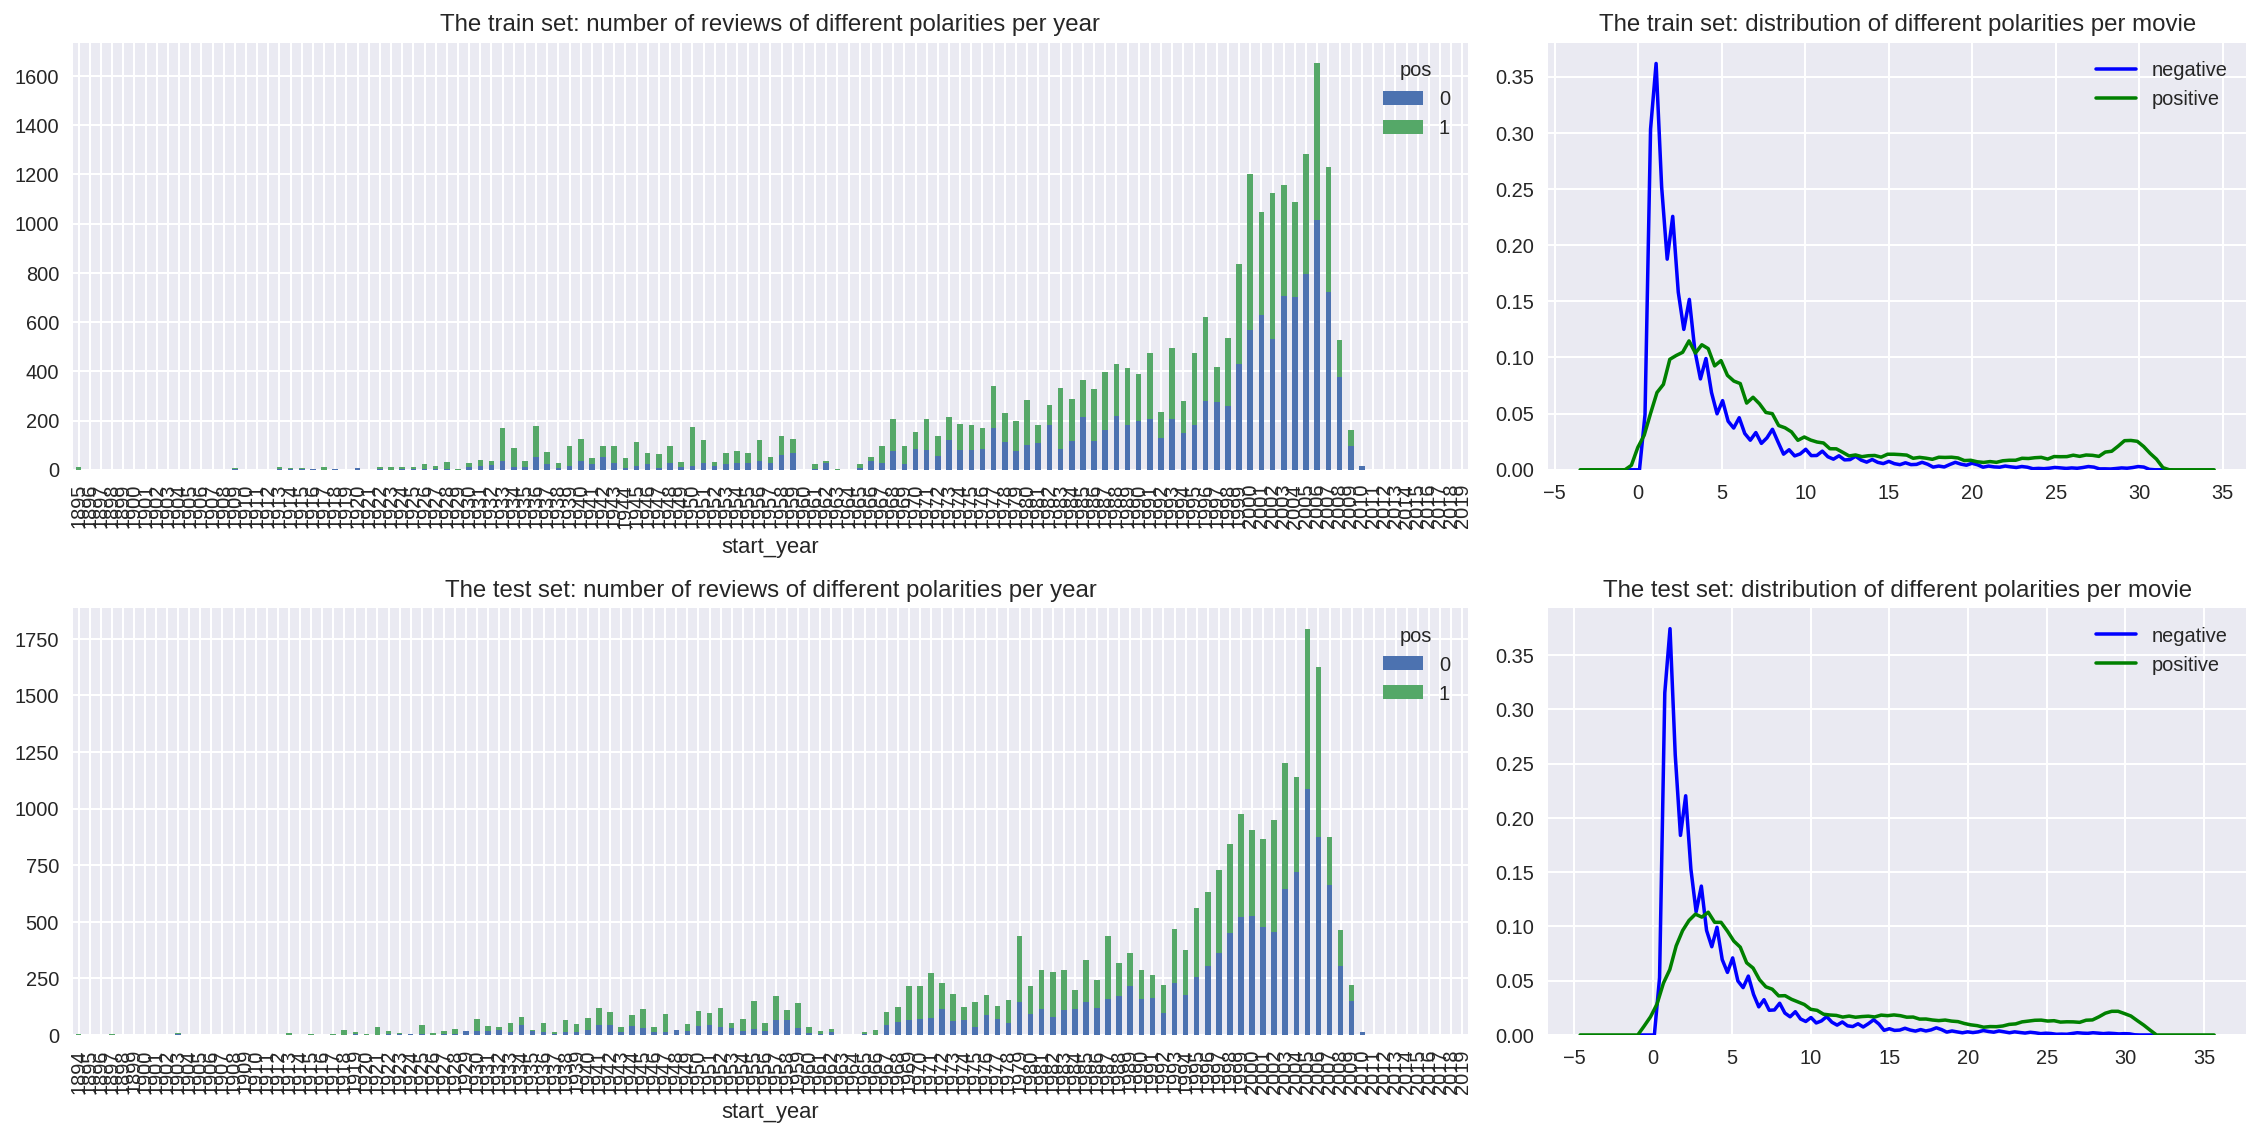

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The train set: number of reviews of different polarities per year')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The train set: distribution of different polarities per movie')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('The test set: number of reviews of different polarities per year')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('The test set: distribution of different polarities per movie')

fig.tight_layout()

**The Distribution of negative and positive reviews over the years in train and test data sets have the same form. also the distribution of negative and positive reviews per movie. It confirms that the sets are balanced. we can see from the right graph that the movies that had the highet number of reviews had mostly positive reviews. Interesting...**

## Evaluation Procedure

Composing an evaluation routine which can be used for all models in this project

In [14]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):
    
    eval_stats = {}
    
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 
    
    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):
        
        eval_stats[type] = {}
    
        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]
        
        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]
        
        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)    
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps
        
        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score') 

        # ROC
        ax = axs[1]    
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'            
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')        
        ax.set_title(f'ROC Curve')
        
        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # setting crosses for some thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])    
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')        

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)
    
    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))
    
    print(df_eval_stats)
    
    return

## Normalization

We assume all models below accepts texts in lowercase and without any digits, punctuations marks etc.

In [15]:
import re

In [16]:
# Defining regular expression function to remove unecessary parts of the text
def clear_text(text):
    
    pattern = r"[^a-zA-Z']"
    text = re.sub(pattern, " ", text)
    text = " ".join(text.lower().split())
    return text

In [17]:
df_reviews['review_norm'] = df_reviews['review'].apply(clear_text)

## Train / Test Split

Luckily, the whole dataset is already divided into train/test one parts. The corresponding flag is 'ds_part'.

In [18]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

review_train = df_reviews_train['review_norm']
review_test = df_reviews_test['review_norm']

target_train = df_reviews_train['pos']
target_test = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23535, 18)


## Working with models

### Model 0 - Constant

In [19]:
from sklearn.dummy import DummyClassifier

In [20]:
dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(review_train, target_train)

dummy_clf.score(review_train, target_train)

0.5005883341738108

### Model 1 - NLTK, TF-IDF and LR

In [21]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [22]:
# Preprocessing
stop_words = set(stopwords.words('english'))
tfidf_vectorizer_2 = TfidfVectorizer(stop_words=stop_words)

print("Preprocessing training data...")
train_features_1 = tfidf_vectorizer_2.fit_transform(review_train)
print("Preprocessing test data...")
test_features_1 = tfidf_vectorizer_2.transform(review_test)

print('The train TF-IDF matrix size:', train_features_1.shape)
print('The test TF-IDF matrix size:', test_features_1.shape)

Preprocessing training data...
Preprocessing test data...
The train TF-IDF matrix size: (23796, 71531)
The test TF-IDF matrix size: (23535, 71531)


In [ ]:
# Logistic Regression

model_1 = LogisticRegression(random_state=12345, solver='warn')

model_1.fit(train_features_1, target_train) 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


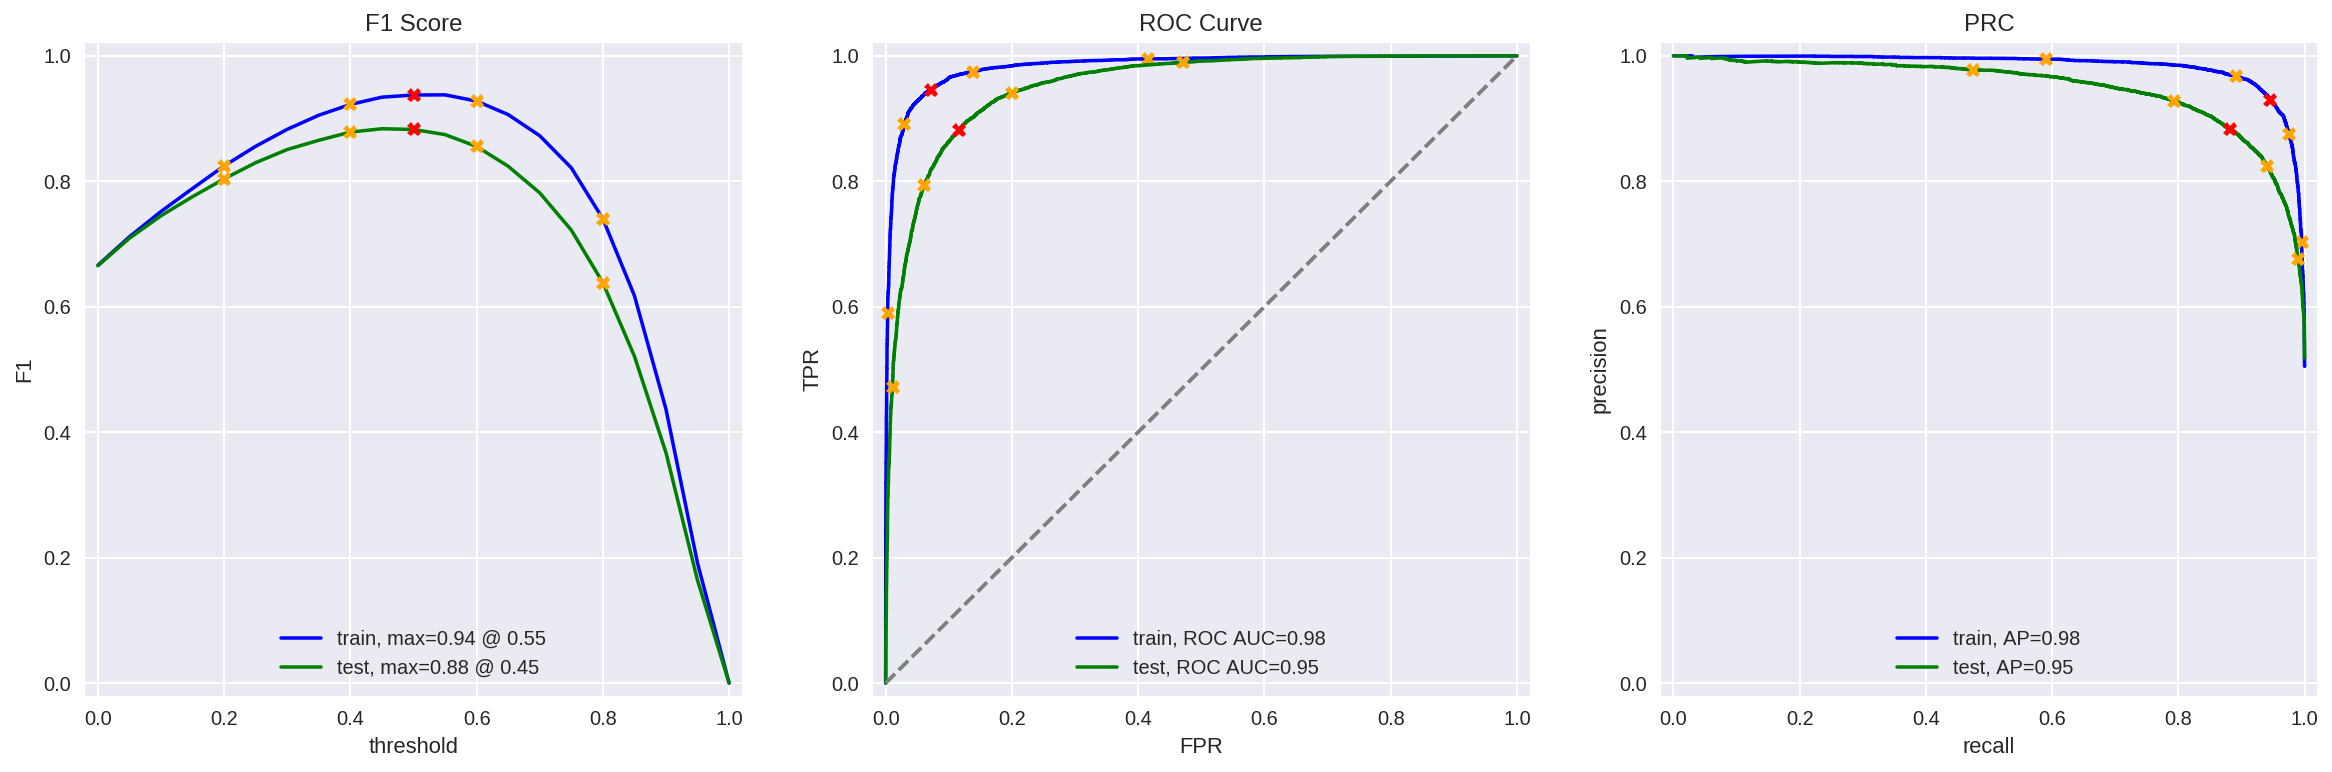

In [24]:
evaluate_model(model_1, train_features_1, target_train, test_features_1, target_test)

### Model 3 - spaCy, TF-IDF and LR

In [25]:
import spacy
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [26]:
# Defining tokenization+lemmatization function
def text_preprocessing_3(text):
    
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [27]:
# Text tokenization and lemmatization 

train_features_3 = review_train.apply(text_preprocessing_3)
test_features_3 = review_test.apply(text_preprocessing_3)

In [28]:
# create a bag-of-words with checking for stop words
stop_words = set(stopwords.words('english'))
count_vect = CountVectorizer(stop_words=stop_words)

bow_train = count_vect.fit_transform(train_features_3)
bow_test = count_vect.transform(test_features_3)

In [29]:
#bow_train.todense()

In [30]:
# Tfidf Transform
tfidf_vectorizer_3 = TfidfTransformer()

train_features_3 = tfidf_vectorizer_3.fit_transform(bow_train)
test_features_3 = tfidf_vectorizer_3.transform(bow_test)

In [31]:
# Logistic Regression

model_3 = LogisticRegression(random_state=12345)

model_3.fit(train_features_3, target_train) 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          train  test
Accuracy   0.93  0.88
F1         0.93  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


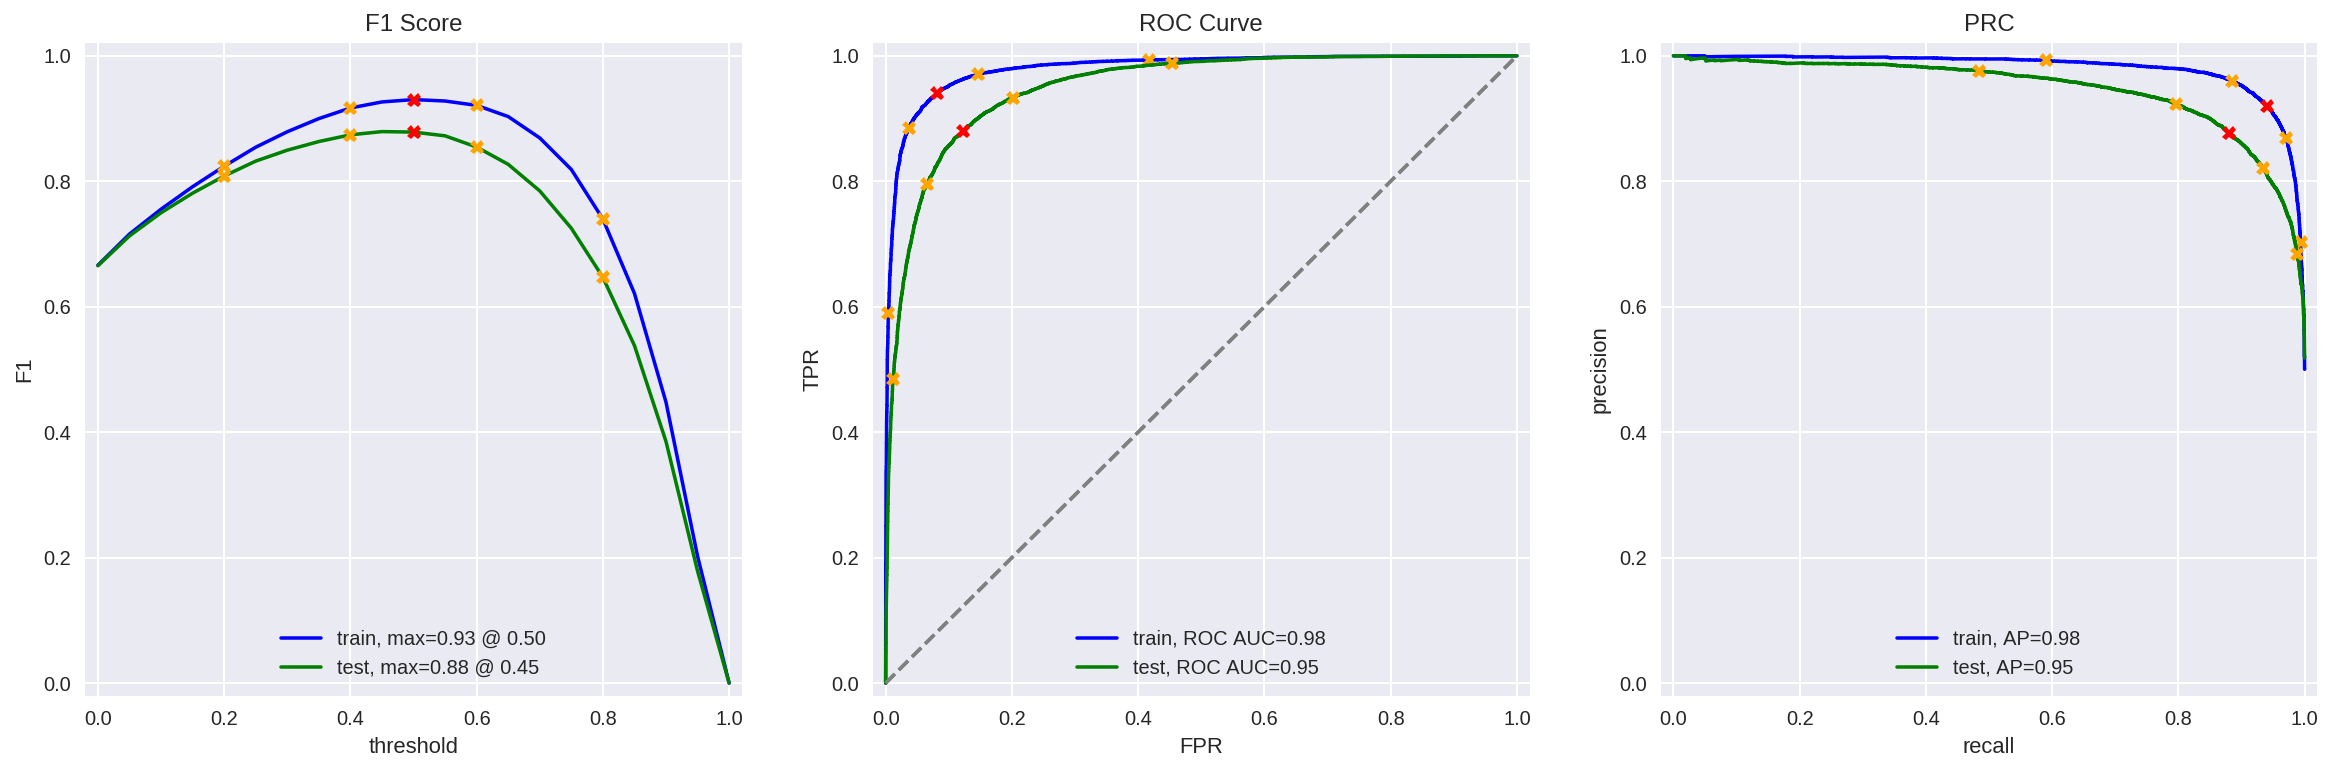

In [32]:
evaluate_model(model_3, train_features_3, target_train, test_features_3, target_test)

### Model 4 - spaCy, TF-IDF and LGBMClassifier

In [33]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [34]:
train_features_4 = train_features_3
test_features_4 = test_features_3

In [35]:
'''
model = LGBMClassifier(random_state=1234)

params = {
    'model__n_estimators': range(10, 50, 20),
    'C': [0.1, 1, 10, 100, 1000],
    'model__max_depth': range(5, 20, 5)
}

lgbmr = GridSearchCV(model, param_grid=params, cv=3, scoring = 'f1')
lgbmr.fit(train_features_4, target_train)

#cv_model_evaluation(lgb)
print(abs(lgbmr.best_score_), lgbmr.best_params_)
'''

"\nmodel = LGBMClassifier(random_state=1234)\n\nparams = {\n    'model__n_estimators': range(10, 50, 20),\n    'C': [0.1, 1, 10, 100, 1000],\n    'model__max_depth': range(5, 20, 5)\n}\n\nlgbmr = GridSearchCV(model, param_grid=params, cv=3, scoring = 'f1')\nlgbmr.fit(train_features_4, target_train)\n\n#cv_model_evaluation(lgb)\nprint(abs(lgbmr.best_score_), lgbmr.best_params_)\n"

In [72]:
# LGBMC Classifier

model_4 = LGBMClassifier(random_state=12345,n_estimators =100,max_depth=20)

model_4.fit(train_features_4, target_train) 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=20,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=12345, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          train  test
Accuracy   0.91  0.85
F1         0.91  0.85
APS        0.97  0.93
ROC AUC    0.97  0.93


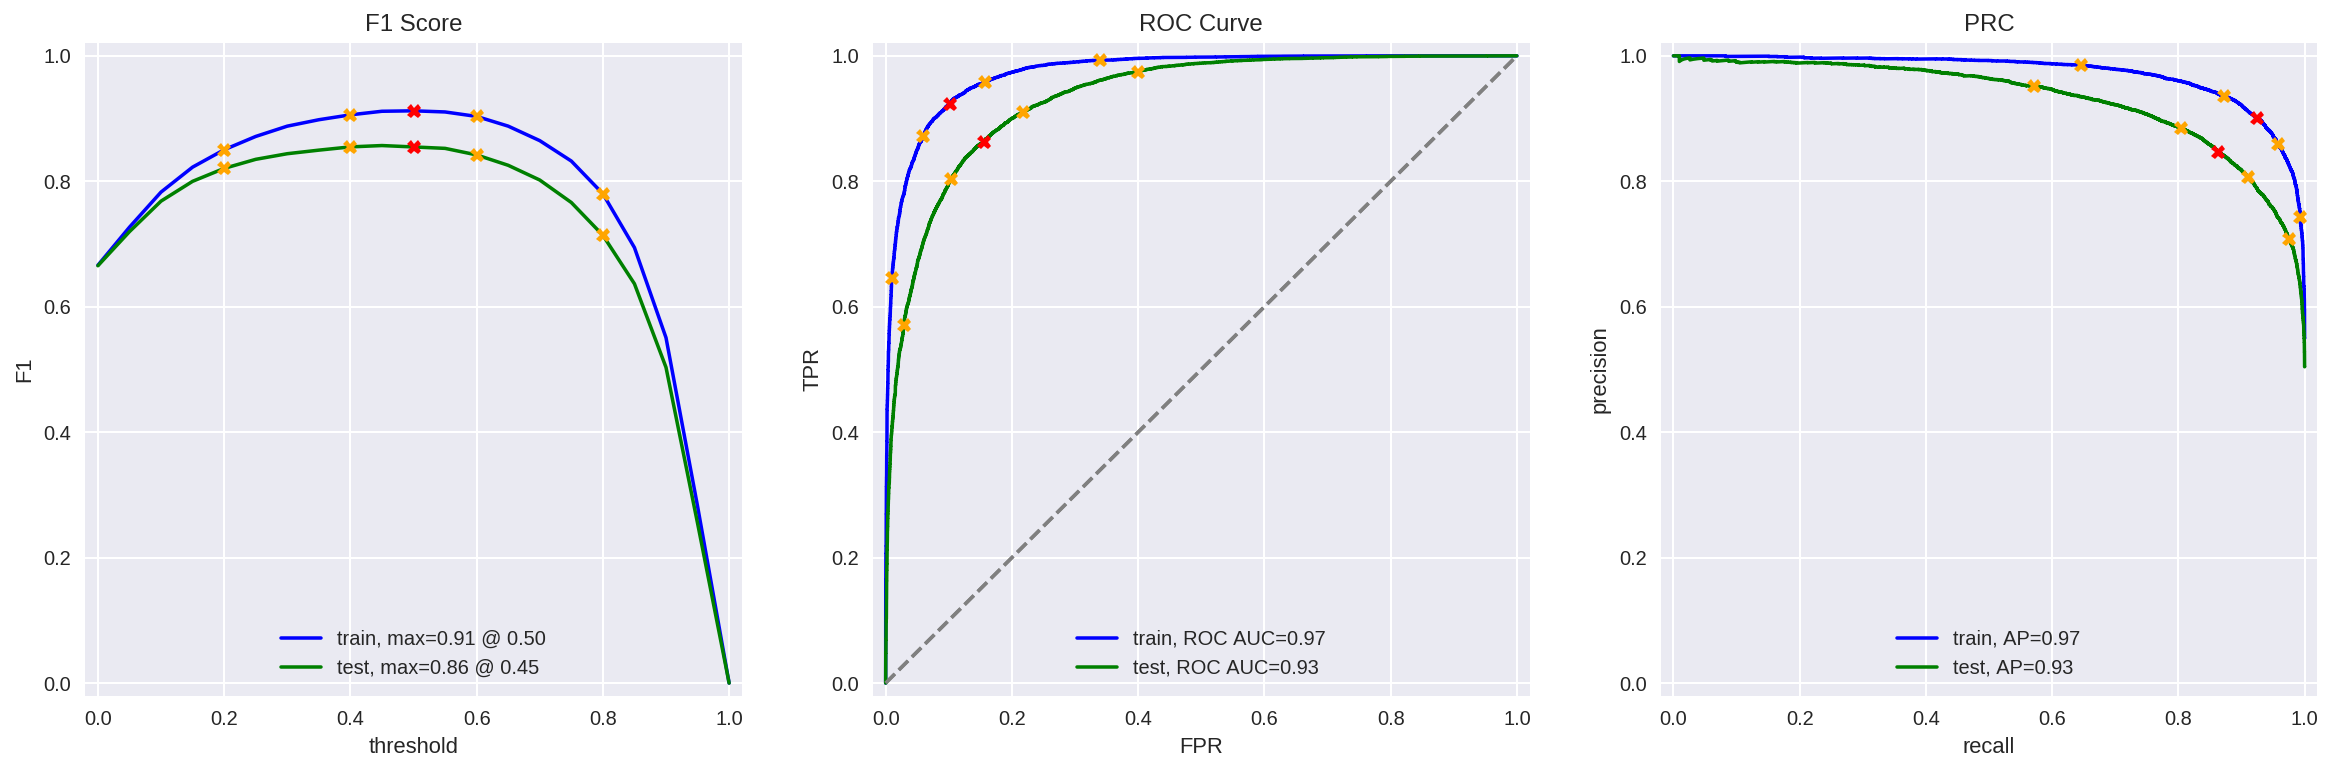

In [73]:
evaluate_model(model_4, train_features_4, target_train, test_features_4, target_test)

###  Model 9 - BERT

In [58]:
import torch
import transformers

In [59]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

In [66]:
# defining variables of 500 records of train and test datasets
train_for_bert = df_reviews_train['review_norm'].iloc[:500]
test_for_bert = df_reviews_test['review_norm'].iloc[:500]
train_for_bert.shape

(500,)

In [60]:
def BERT_text_to_embeddings(texts, max_length=256, batch_size=50, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # text to padded ids of tokens along with their attention masks
    
    for text in texts:
        ids = tokenizer.encode(    # convert words into token IDs.
            text.lower(),
            add_special_tokens=True,
            truncation=True,
            max_length=max_length
        )
        padded = np.array(        # pad IDs with zeros up to max_length
            ids + [0]*(max_length - len(ids))
        )
        attention_mask = np.where(padded != 0, 1, 0) # mask with ones where there's an ID and zeros where zero
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Using the {device} device.')
    
    # gettings embeddings in batches

    embeddings = []
    tqdm_range = tqdm(
        range(math.ceil(len(ids_list)/batch_size)),
        disable=disable_progress_bar
    )
    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        attention_array = np.array(attention_mask_list[batch_size*i:batch_size*(i+1)])
        attention_mask_batch = torch.LongTensor(attention_array).to(device)
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [2]:
# Attention! Running BERT for thousands of texts may take long run on CPU, at least several hours
'''
train_features_9 = BERT_text_to_embeddings(train_for_bert, force_device='cuda')
'''

"\ntrain_features_9 = BERT_text_to_embeddings(train_for_bert, force_device='cuda')\n"

In [ ]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)

In [ ]:
# if you have got the embeddings, it's advisable to save them to have them ready if 
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# and load...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

## My Reviews

In [122]:
# feel free to completely remove these reviews and try your models on your own reviews, those below are just examples
# I added some reviews of my own
my_reviews = pd.DataFrame([
    'Such a bad movie. I hated every moment',
    'Too slowly, nothing hapend in the first hour. it improved in the second hour',
    'I would not recommand it to my friends. but I enjoyed the movie',
    'The movie is not for everyone. the visuals are fascinating, a very poetic film',
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(clear_text)
my_targets = [0,0,1,1,0,0,1,0,1,1,0,1]
my_reviews

,review,review_norm
0,Such a bad movie. I hated every moment,such a bad movie i hated every moment
1,"Too slowly, nothing hapend in the first hour. ...",too slowly nothing hapend in the first hour it...
2,I would not recommand it to my friends. but I ...,i would not recommand it to my friends but i e...
3,The movie is not for everyone. the visuals are...,the movie is not for everyone the visuals are ...
4,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
5,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middle...
6,I was really fascinated with the movie,i was really fascinated with the movie
7,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
8,I didn't expect the reboot to be so good! Writ...,i didn't expect the reboot to be so good write...
9,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i ...


### Model 2

In [123]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_1.predict_proba(tfidf_vectorizer_2.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.04:  such a bad movie i hated every moment
0.16:  too slowly nothing hapend in the first hour it improved in the second hour
0.70:  i would not recommand it to my friends but i enjoyed the movie
0.85:  the movie is not for everyone the visuals are fascinating a very poetic film
0.14:  i did not simply like it not my kind of movie
0.16:  well i was bored and felt asleep in the middle of the movie
0.54:  i was really fascinated with the movie
0.11:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.31:  i didn't expect the reboot to be so good writers really cared about the source material
0.47:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.04:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.82:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


In [124]:
# F1 when threshold = 0.5
f1_scores = metrics.f1_score(my_targets, my_reviews_pred_prob>=0.5)
print('F1: ', f1_scores)

F1:  0.8


In [125]:
# F1 
predictions = model_1.predict(tfidf_vectorizer_2.transform(texts))
model_1_f1 = metrics.f1_score(my_targets, predictions)
model_1_f1

0.8

### Model 3

In [126]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_3.predict_proba(tfidf_vectorizer_3.transform(count_vect.transform(texts.apply(lambda x: text_preprocessing_3(x)))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.01:  such a bad movie i hated every moment
0.10:  too slowly nothing hapend in the first hour it improved in the second hour
0.69:  i would not recommand it to my friends but i enjoyed the movie
0.80:  the movie is not for everyone the visuals are fascinating a very poetic film
0.27:  i did not simply like it not my kind of movie
0.08:  well i was bored and felt asleep in the middle of the movie
0.44:  i was really fascinated with the movie
0.11:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.24:  i didn't expect the reboot to be so good writers really cared about the source material
0.54:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.02:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.91:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


In [127]:
# F1 when threshold = 0.5
f1_scores = metrics.f1_score(my_targets, my_reviews_pred_prob>=0.5)
print('F1: ', f1_scores)

F1:  0.8


### Model 4

In [128]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = model_4.predict_proba(tfidf_vectorizer_3.transform(count_vect.transform(texts.apply(lambda x: text_preprocessing_3(x)))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.12:  such a bad movie i hated every moment
0.33:  too slowly nothing hapend in the first hour it improved in the second hour
0.68:  i would not recommand it to my friends but i enjoyed the movie
0.64:  the movie is not for everyone the visuals are fascinating a very poetic film
0.65:  i did not simply like it not my kind of movie
0.30:  well i was bored and felt asleep in the middle of the movie
0.61:  i was really fascinated with the movie
0.37:  even the actors looked really old and disinterested and they got paid to be in the movie what a soul
0.63:  i didn't expect the reboot to be so good writers really cared about the source material
0.70:  the movie had its upsides and downsides but i feel like overall it's a decent flick i could see myse
0.25:  what a rotten attempt at a comedy not a single joke lands everyone acts annoying and loud even kids 
0.71:  launching on netflix was a brave move i really appreciate being able to binge on episode after episo


In [129]:
# F1 when threshold = 0.5
f1_scores = metrics.f1_score(my_targets, my_reviews_pred_prob>=0.5)
print('F1: ', f1_scores)

F1:  0.923076923076923


### Model 9

In [1]:
'''
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')
'''   

"\ntexts = my_reviews['review_norm']\n\nmy_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)\n\nmy_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]\n\nfor i, review in enumerate(texts.str.slice(0, 100)):\n    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')\n"

## Conclusions

### F1 comparison between models

Model 0 - Constant :                           Score = 0.50

Model 1 - NLTK, TF-IDF and LR:                 F1 score = 0.88

Model 3 - spaCy, TF-IDF and LR:                F1 score = 0.88

Model 4 - spaCy, TF-IDF and LGBMClassifier:    F1 score = 0.85

**My Reviews scoring**

Model 1 -                                      F1 score = 0.8

Model 3 -                                      F1 score = 0.8

Model 4 -                                      F1 score = 0.85

**Summary:**

- All the models performed better then the constant model.

- They also succeded in reaching an F1 score of at least 0.85

- Models 1 and 3, using different text preprocessing method but the same training model Logistic Regression, have the same and better F1 score - 0.88

- Model 4, which uses same preprocessing method as model 3 but different training model (LGBM classifier), got lower F1 score - 0.85

- With the small test set of my reviews, the F1 scores are lower.

- The results are also opposite, where Model 4 provided better results then the other models.

We can conclude that different preprocessing ways, that lead to the same result (TF-IDF) dosn't influence the predictions results.

Why the models' F1 score with "My reviews" is lower? I assume its because of the very small sample set, where there is no place for errors, since each prediction have  

Why does LGBM classifier performs better then the 2 other models on the 'my reviews' test set? I assume that is also because of the very small sample set